## 导入包 数据库

In [2]:
import numpy as np  #导入numpy
import pandas as pd #导入pandas
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer #导入训练数据

In [4]:
from sklearn.model_selection import train_test_split #导入切分类train_test_split

In [5]:
from sklearn.model_selection import cross_val_score  #导入交叉验证类cross_val_score

In [6]:
from sklearn.neighbors import KNeighborsClassifier  #导入KNN算法类

In [7]:
from sklearn.preprocessing import MinMaxScaler #导入0-1标准化类

## 从sklearn.datasets 中载入练习数据

In [8]:
breast_cancer =load_breast_cancer()
breast_cancer.keys()  # 查看数据标签

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
breast_cancer.target_names  #查看Y值

array(['malignant', 'benign'], dtype='<U9')

## 对数据进行训练集和测试集的切分

In [13]:
x = breast_cancer.data
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
y = breast_cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1000)

## 对数据集进行0-1标准化处理

In [23]:
min_max = MinMaxScaler() #实例化类

In [26]:
min_max.fit(X_train,y_train) #用0-1标准化对训练集数据进行训练

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
train_min_max = min_max.transform(X_train)

## 对0-1标准化后的训练集进行交叉验证

In [29]:
knn = KNeighborsClassifier()  #实例化KNN类

In [50]:
scores = []   #建立测试分数集   表示聚合程度
stds = []     #建立标准差集    表示离散程度
for i in range(1,31): 
    knn = KNeighborsClassifier(n_neighbors=i)   #实例化API 对K进行遍历
    cross_result = cross_val_score(knn, train_min_max, y_train , cv = 5)  #直接对不同K值的knn进行交叉验证
    score_mean = cross_result.mean()
    std = cross_result.std()
    scores.append(score_mean)
    stds.append(std)

In [51]:
best_k = np.argmax(scores) + 1  #找出最优K
best_k

10

## 绘制学习曲线

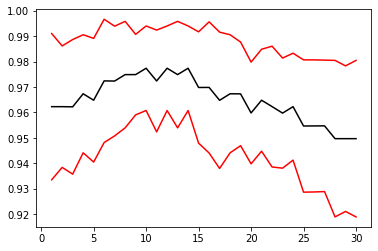

In [52]:
plt.plot(range(1,31),scores,c = 'black')
plt.plot(range(1,31),np.array(scores) + np.array(stds),c = 'red')
plt.plot(range(1,31),np.array(scores) - np.array(stds),c = 'red')

## 建模--对测试数据0-1标准化--测试

In [47]:
knn_best = KNeighborsClassifier(n_neighbors=10)   #实例化knn 传入最优K = 10

In [53]:
min_max_test = min_max.transform(X_test)

In [56]:
knn_best.fit(min_max_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [57]:
knn_best.score(min_max_test,y_test)

0.9824561403508771